# Lab Assignment 11: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Question 1 (10 Marks)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

300


Text(0.5, 0, 'Age (years)')

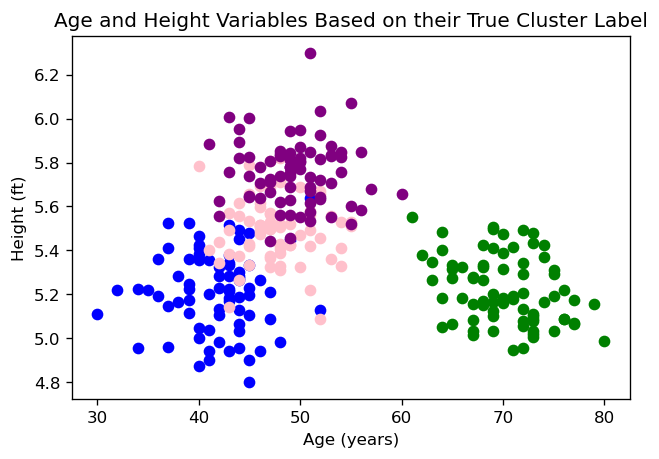

In [2]:
#load age and height data
data = pd.read_csv("age_height_data.csv")
X = data[["age", "height", "true_cluster_label"]]
x = data.drop(["true_cluster_label"], axis=1)
true_cluster = data.true_cluster_label
data.head()
print(true_cluster.size)

fig, ax = plt.subplots(dpi = 120)
color = ['blue', 'pink', 'purple', 'green']

for k in range(4):
    data=X[X["true_cluster_label"]==k+0]
    plt.scatter(data["age"],data["height"],c=color[k])
    
plt.title('Age and Height Variables Based on their True Cluster Label') #adding a title to the plot
plt.ylabel("Height (ft)") #x axis label
plt.xlabel("Age (years)") #y axis label



## Question 2 (10 Marks)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

Text(0.5, 0, 'Age (years)')

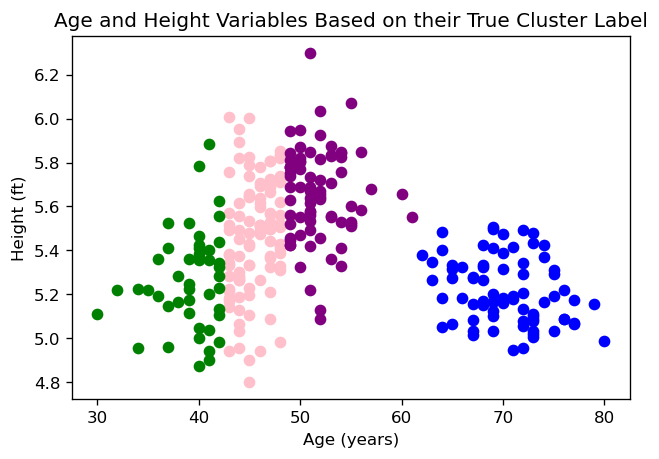

In [3]:
# Let's use a pipeline so we can add preprocessing steps later
cl_pipe = Pipeline([
    ('kmeancl',KMeans(n_clusters=4)) # Name of operator and cluster number
])

# Fit the cluster and predict the label in one step. Calls any preprocessing step plus model
x['clusters_predict']= cl_pipe.fit_predict(x)

fig, ax = plt.subplots(dpi = 120)
color = ['blue', 'pink', 'purple', 'green']

for k in range(4):
    data=x[x["clusters_predict"]==k+0]
    plt.scatter(data["age"],data["height"],c=color[k])
    
plt.title('Age and Height Variables Based on their True Cluster Label') #adding a title to the plot
plt.ylabel("Height (ft)") #x axis label
plt.xlabel("Age (years)") #y axis label

## Question 3 (10 Marks)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

No, this does not look like the true cluster labels, because the true cluster labels overlap each other on the left side of the plot, they are not so distinctly seperated by a verticle line. 

This result can be explained because the K-Means algorithm is sensitive to imbalance between the number of points in different clusters. It may well end up with clusters that cut through a dense cloud of points while including far away elements, for the sake of saving the cost incurred by having too many points in one cluster. Additionally, Kmean clustering uses a distance between the instances (typically Eucliden distance) and assumes the instances to be clustered are p-dimensional vectors and since the solution depends on the intial assignment of the instances it is important to standardize the scaling to avoid bias. Since these instances have not been scaled then the clustering prioritized clustering based on the age since there is such a larger scale from 30-80 compared to 4.8 to 6.3. And no these are not comparable scales, so that is why the kmean clustering prioritized the age scale.

## Question 4 (10 Marks)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

Text(0.5, 0, 'Age (years)')

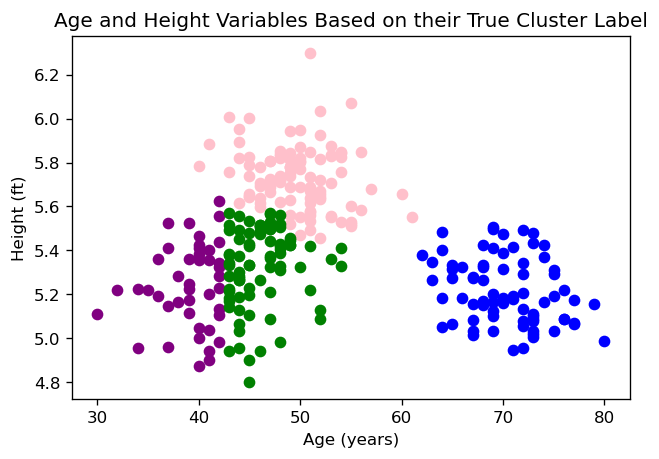

In [4]:
# Now we create a proper pipeline with scaling and a model
cl_pipe2 = Pipeline([
    ('scale', StandardScaler()),
     ('kmeancl',KMeans(n_clusters=4)) 
])

# Fit the cluster and predict the label in one step. Calls any preprocessing step plus model
x['clusters_predict']= cl_pipe2.fit_predict(x)

fig, ax = plt.subplots(dpi = 120)
color = ['blue', 'pink', 'purple', 'green']

for k in range(4):
    data=x[x["clusters_predict"]==k+0]
    plt.scatter(data["age"],data["height"],c=color[k])
    
plt.title('Age and Height Variables Based on their True Cluster Label') #adding a title to the plot
plt.ylabel("Height (ft)") #x axis label
plt.xlabel("Age (years)") #y axis label

## Question 5 (10 Marks)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Hint: If you have a pipeline with a clustering step called `kmeans` in it, you can change the number of clusters, do a new fit, and get the score like so:

```
# Suppose clusters is desired number of clusters,
# and your pipeline is called kmn_pipe, which has
# a k-means step called kmeans:
kmn_pipe.named_steps['kmeans'].set_params(n_clusters = clusters)
kmn_pipe.fit(X)
newscore = (-kmn_pipe.score(X))
```

Create an elbow plot for this data.

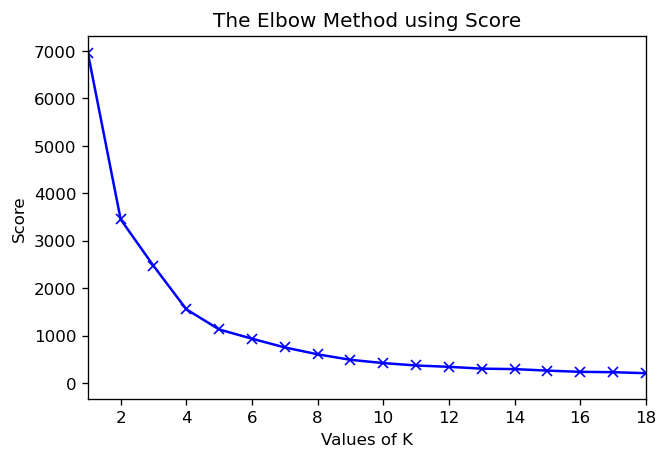

In [5]:
# Suppose clusters is desired number of clusters,
# and your pipeline is called kmn_pipe, which has
# a k-means step called kmeans:
K = range(2, 20)

totalscore=[17]

for k in K:
    #building and fitting the model
    cl_pipe.named_steps['kmeancl'].set_params(n_clusters = k)
    cl_pipe.fit(X)
    newscore = (-cl_pipe.score(X))
    totalscore.append(newscore)
    
fig, ax = plt.subplots(dpi = 120)    
plt.xlim(1, 18)
plt.plot(totalscore, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Score') 
plt.title('The Elbow Method using Score') 
plt.show() 

## Question 6 (10 Marks)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

In the above plot when we changed the cluster value from 2 to 4 the score reduced very sharply. This decrease in the score value reduces and eventually becomes a constant as we increase the number of clusters further. So the "elbow" for this data set is located between 4 and 6 because this is where the decrease in the score value roughly becomes constant. The point of the elbow method is to add clusters until it doesn't help much anymore. Therefore, we can choose any number of clusters between 4 and 6. Though, we could also consider the computation cost while considering the number of clusters.  If we increase the number of clusters, the computation cost will also increase. So, if it is more ideal to have less computational cost for the specific project, the most ideal cluster number for this data set would be 4. Note: the elbow method can sometimes be ambiguous an alternative is the average silhouette method which can also be used for any clustering approach. But for this particular data set the elbow method worked just perfectly!

## Question 7 (40 Marks)

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

3) Summarize the author's criticisms of the practitioner's approach to clustering.

4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

1) The author thinks the two requirements of clustering, which are that similar (or close w.r.t. the underlying distance function) elements must share the same cluster and the members of each cluster are all similar conflict with one another. The author thinks this because it is the simplest "clustering impossibility theorem". A simple example they give is to consider a collection of elements scattered next to each other along a long line. First, if the data must satisfy "every pair of close by elements share the same cluster" then all of the data points must be combined into a single joint cluster. However, doing so directly violates the second requirement because now we would end up with dissimilar elements sharing the same cluster. Therefore, it is apparent that this definition is problematic. 

2) The author has several criticisms of the theoretician's approach to clustering. The author really critizes theoretician's, in the algorithms and complexity research, for focusing and deovting a lot of their effort into coming up with efficenient approximation algorithms for clustering objective minimization. Whereas, the author strongly argues that they believe in most clustering applications the users don't care about finding such a cost minimizing solution. The author goes on to even explain how pointless it is to focus so much effort in this area, because user can never even evaluate how close to the minimum possible is the cost of the clustering output by some algorithm. Additionally, the author talks about how basically all research papers refrain from addressing or make even an attempt to analyze which clustering properties do their algoithms differ from existing solutions. The author concludes by comparing sophisticated theoretician's approach to clustering just the same as practitioners - thoughtless and careless. 

3) The author has several criticisms of the practitioner's approach to clustering. Overall, the author critizies practitioners, including even the most otherwise-sophisticated users such as biologists, astronomers, physicists, and more, with carelessly selecting their clustering tool with basically no thought and based mainly on convenience. The author goes on to mention that several of these practitioners that they have interacted with tend to use fluff words such as "commonly used", "user friendly", "easy to run" and more to justify their selection. Finally, the author uses an analogy to compare these decisions with a doctor justifying prescribing you a specific medication. This analogy allows the reader to really comprehend and understand how carless the practioners are when it comes to their clustering approachs. 

4) As a practitioner reading this article has improved and altered my thought process when selecting an algorithm to use for clustering, because I learned so much and I am more informed on common conflicts and approachs. Moving forward, I will now research and access tools that allow me to understand domain expertise and task requirements. Plus, I will ensure to one of the two informed choices of clustering tools he mentioned in the paper (An analytic approach and interactive semi-supervised cluster) in order to thoughtfully select my clustering approach. Finally, I will never forget that there is no universally optimal clustering algorithm. An algorithm is never just "better" than another alogorithm, it may simply just be better for some specific clustering tasks.  